In [1]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import numpy as np
import pandas as pd
import tweepy
import json_lines
import re
import json
from urllib.parse import urlparse
import requests

In [2]:
all_path=["data/all_data_split/xaa.pkl","data/all_data_split/xab.pkl","data/all_data_split/xac.pkl","data/all_data_split/xad.pkl","data/all_data_split/xae.pkl","data/all_data_split/xaf.pkl","data/all_data_split/xag.pkl"]
full_path="data/all_data_full_425.json"
#df = pd.read_pickle(all_path[0])

In [3]:
#with open('data/all_data_split/xaa') as f:
#    df = pd.DataFrame(json.loads(line) for line in f)
#df.to_pickle("data/all_data_split/xaa.pkl")
with open('data/all_data_split/xab') as f:
    df = pd.DataFrame(json.loads(line) for line in f)
df.to_pickle("data/all_data_split/xab.pkl")
with open('data/all_data_split/xac') as f:
    df = pd.DataFrame(json.loads(line) for line in f)
df.to_pickle("data/all_data_split/xac.pkl")
with open('data/all_data_split/xad') as f:
    df = pd.DataFrame(json.loads(line) for line in f)
df.to_pickle("data/all_data_split/xad.pkl")
with open('data/all_data_split/xae') as f:
    df = pd.DataFrame(json.loads(line) for line in f)
df.to_pickle("data/all_data_split/xae.pkl")
with open('data/all_data_split/xaf') as f:
    df = pd.DataFrame(json.loads(line) for line in f)
df.to_pickle("data/all_data_split/xaf.pkl")
with open('data/all_data_split/xag') as f:
    df = pd.DataFrame(json.loads(line) for line in f)
df.to_pickle("data/all_data_split/xag.pkl")

This week we keep on hydrating the data and We are kind of worry about can we due with such as huge amount of data.

In [4]:
all_values=pd.DataFrame()
for path in all_path:
    print(path)
    df = pd.read_pickle(path)
    all_values=all_values.append(df[['author_id','text','id']])
    df=0
df=all_values
pattern_link='.*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+.*'
pattern_re='RT @.*'
series_a=df['text'].str.contains(pattern_re)  
series_b=df['text'].str.contains(pattern_link)
P_re=series_a.mean()
P_url=series_b.mean()
unqiue_author=len(df['author_id'].unique())

data/all_data_split/xaa.pkl
data/all_data_split/xab.pkl
data/all_data_split/xac.pkl
data/all_data_split/xad.pkl
data/all_data_split/xae.pkl
data/all_data_split/xaf.pkl
data/all_data_split/xag.pkl


In [5]:

with open('result.txt', 'w') as f:
    f.write('EDA:'+'\n')
    f.write('- the proportion of tweets that contain a URL is '+str(P_url)+'\n')
    f.write('- the number of unique users is '+str(unqiue_author)+'\n')
    f.write('- the proportion of the data that are retweets '+str(P_re)+'\n')
    f.write('\n')


In [6]:
df=0

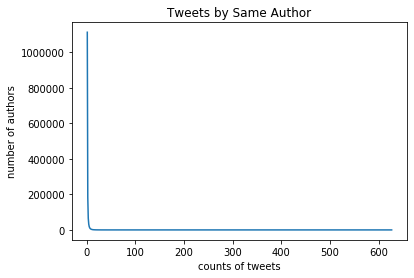

In [7]:
all_values=pd.DataFrame()
for path in all_path:
    df = pd.read_pickle(path)
    all_values=all_values.append(df[['author_id','text','id']])
    df=0
df=all_values
all_values=0
ax=df.groupby('author_id').count().groupby('text').count()['id'].plot(title='Tweets by Same Author')
ax.set_ylabel('number of authors')
ax.set_xlabel('counts of tweets')
ax.figure.savefig('same_author.jpg')

In [8]:
def extra_link(text):
    pattern='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.findall(pattern,text)

def check_domain(url_list):
    if url_list:
        try:
            r=requests.head(url_list[0]) 
            link=r.headers['location']
            domain=urlparse(link).netloc
            return domain
        except:
            try: 
                link=requests.get(url_list[0]).url
                domain=urlparse(link).netlocA
                return domain
            except:
                return ''
    return ''

In [ ]:
count=0
with open(full_path) as f:
    for line in f:
        load_line=json.loads(line)
        count=count+1
        if count<=470315:
            continue
        json_record=dict() 
        json_record['id']=load_line['id']
        link_list=extra_link(load_line['text'])
        json_record['domain']=check_domain(link_list)
        with open('data/link_data.json','a+', encoding='utf-8') as f:
            json_record = json.dumps(json_record, ensure_ascii=False)
            f.write(json_record + '\n')


In [ ]:
with open('data/link_data.json') as f:
    link_df=pd.DataFrame(json.loads(line) for line in f)

In [ ]:
link_df

In [ ]:
proportion_request=len(link_df[link_df['domain'].apply(lambda x: x !='')])/len(link_df)

In [ ]:
proportion_request

In [ ]:
misinfo=pd.read_csv('test/testdata/iffy.csv')
domains=misinfo['Domain']


misinfor_tweets=link_df['domain'].apply(lambda x: x in list(domains))
proportion_mis=misinfor_tweets.mean()

fact=['politifact.com', 'factcheck.org', 'washingtonpost.com', 'snopes.com', 'reporterslab.org', 'factcheck.org', 'flackcheck.org', 'mediabiasfactcheck.com', 'npr.org']
proportion_fact=link_df['domain'].apply(lambda x: x in fact).mean()

In [ ]:

proportion_mis

In [ ]:
proportion_fact

In [ ]:
all_values=pd.DataFrame()
for path in all_path:
    print(path)
    df = pd.read_pickle(path)
    all_values=all_values.append(df[['author_id','text','id','public_metrics']])
    df=0
df=all_values

In [ ]:
df['retweet']=df['public_metrics'].apply(lambda x: x['retweet_count'])
most_popular=df.sort_values('retweet',ascending=False).head(10000)
most_popular.to_csv('most_popular.csv')

In [ ]:
extra_text=most_popular['text'].apply(lambda x: extra_link(x))

In [ ]:
top_links=extra_text.apply(lambda x: check_domain(x))

In [ ]:
misinfor_tweets=top_links.apply(lambda x: x in list(domains))
proportion_top_mis=misinfor_tweets.mean()

fact=['politifact.com', 'factcheck.org', 'washingtonpost.com', 'snopes.com', 'reporterslab.org', 'factcheck.org', 'flackcheck.org', 'mediabiasfactcheck.com', 'npr.org']
proportion_top_fact=top_links.apply(lambda x: x in fact).mean()

In [ ]:
len(top_links[top_links.apply(lambda x: x !='')])/len(top_links)

In [ ]:
proportion_top_fact

In [ ]:
def cluster_ids(x):
    if 'author_id' in x['referenced_tweets'][0].keys():
        return (x['author_id'],x['referenced_tweets'][0]['author_id'])
    else:
        return False


In [ ]:
import networkx as nx
G = nx.DiGraph()
for path in all_path:
    print(path)
    df_s = pd.read_pickle(path)
    df_s=df_s[['author_id','text','id','referenced_tweets']]
    df_s=pd.merge(link_df,df_s)
    print('merge')
    exist_RT=df_s[df_s['referenced_tweets'].notna()]
    edges=exist_RT.apply(lambda x: cluster_ids(x)  , axis=1)
    print('edge')
    G.add_edges_from(edges[edges != False])
    #df_s=0
    edges=0
    exist_RT=0
    break

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
core_num=nx.algorithms.core.core_number(G)
core_num

In [ ]:
core_num

In [ ]:
df_s['degree']=df_s['author_id'].apply(lambda x: core_num[x] if x in core_num.keys() else 0)
df_s['misinfor_tweets']=df_s['domain'].apply(lambda x: x in list(domains))

fact=['politifact.com', 'factcheck.org', 'washingtonpost.com', 'snopes.com', 'reporterslab.org', 'factcheck.org', 'flackcheck.org', 'mediabiasfactcheck.com', 'npr.org']
df_s['fact_tweets']=df_s['domain'].apply(lambda x: x in fact)

In [ ]:
ax=df_s.groupby('degree').mean()['misinfor_tweets'].plot()
ax.figure.savefig('spead_mis.jpg')

In [ ]:
ax=df_s.groupby('degree').mean()['fact_tweets'].plot()
ax.figure.savefig('spead_fact.jpg')

In [ ]:
average_tweet=list()

In [ ]:
average_tweet.append(df_s[df_s['degree']==0].groupby('author_id').count()['text'].mean())
average_tweet.append(df_s[df_s['degree']==1].groupby('author_id').count()['text'].mean())
average_tweet.append(df_s[df_s['degree']==2].groupby('author_id').count()['text'].mean())
average_tweet.append(df_s[df_s['degree']==3].groupby('author_id').count()['text'].mean())
average_tweet.append(df_s[df_s['degree']==4].groupby('author_id').count()['text'].mean())
average_tweet.append(df_s[df_s['degree']==5].groupby('author_id').count()['text'].mean())

In [ ]:
ax=pd.DataFrame(average_tweet).plot.bar()
ax.figure.savefig('average_tweets.jpg')

In [ ]:
df_s[df_s['degree']==2]

In [ ]:
max(list(core_num.values()))

In [ ]:
G.number_of_edges()

In [ ]:
ax=pd.Series(list(core_num.values())).hist()
ax.set_title('spread of degree for each user')
ax.set_ylabel('number of authors')
ax.set_xlabel('degree of core')
ax.figure.savefig('spead_cores.jpg')

In [ ]:
core_num=nx.algorithms.core.core_number(G)
max_core=max(list(core_num.values()))
num_edge=G.number_of_edges()
with open('result.txt', 'a') as f:
    f.write('Misinformation:'+'\n')
    f.write('- the maximum degree of all the nodes is '+str(max_core)+'\n')
    f.write('- the number of edges in this graph is '+str(num_edge)+'\n')
    f.write('\n')

In [ ]:
misinfo=pd.read_csv('testdata/iffy.csv')
misinfo


In [ ]:
def extra_link(text):
    pattern='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return re.findall(pattern,text)

In [ ]:
def check_domain(url_list):
    if url_list:
        try:
            r=requests.head(url_list[0]) 
            link=r.headers['location']
            domain=urlparse(link).netloc
            return domain
        except:
            try: 
                link=requests.get(url_list[0]).url
                domain=urlparse(link).netlocA
                return domain
            except:
                return ''
    return ''

In [ ]:
domains=misinfo['Domain']
domains

In [ ]:
link_list=df['text'].apply(extra_link)
checked=link_list.apply(lambda x:check_domain(x))

In [ ]:
proportion_mis=checked.apply(lambda x: x in domains).mean()

In [ ]:
df['retweet']=df['public_metrics'].apply(lambda x: x['retweet_count'])
most_popular=df.sort_values('retweet').head(200)


In [ ]:
most_popular.to_csv('most_popular.csv')